## Project Description

You work as an analyst for the telecommunications company Megaline, which offers customers two prepaid plans: Surf and Ultimate. The commercial department wants to know which plan generates more revenue in order to adjust the advertising budget.

You will perform a preliminary analysis of the plans based on a small sample of customers. The dataset includes 500 Megaline clients: who they are, where they live, which plan they use, and the number of calls and messages they made in 2018. Your task is to analyze customer behavior and determine which prepaid plan generates more revenue. Later in the project instructions, you will see exactly which aspects of customer behavior need to be analyzed. Determining which plan, on average, generates more revenue is a task that can be solved using statistical tests.

## Plan Description

Note: Megaline rounds seconds to minutes and megabytes to gigabytes. For calls, each individual call is rounded up: even if a call lasted only one second, it will be counted as one full minute. For web traffic, individual sessions are not rounded up. Instead, the monthly total is rounded up. For example, if someone uses 1,025 MB in a month, they are billed for 2 GB.

Here are the details of the plans:

Surf

Monthly fee: $20

500 monthly minutes, 50 text messages, and 15 GB of data included

After exceeding the package limits:

1 minute: $0.03

1 text message: $0.03

1 GB of data: $10

Ultimate

Monthly fee: $70

3,000 monthly minutes, 1,000 text messages, and 30 GB of data included

After exceeding the package limits:

1 minute: $0.01

1 text message: $0.01

1 GB of data: $7

# 1. Which Plan Performs Better?



## Introduction

In [1]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np

# Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Statistical Testing
from scipy import stats
from scipy.stats import ttest_ind

pd.set_option('display.max_columns',None)

# Load the Data

In [2]:
# Load Data Files into Separate DataFrames
calls = pd.read_csv('datasets/megaline_calls.csv')
internet = pd.read_csv('datasets/megaline_internet.csv')
messages = pd.read_csv('datasets/megaline_messages.csv')
plans = pd.read_csv('datasets/megaline_plans.csv')
users = pd.read_csv('datasets/megaline_users.csv')


 ## 1.3 Prepare the Data

The data in this project is divided into several tables. Each table was explored to gain an initial understanding of the dataset. Necessary corrections were applied individually to ensure accuracy and consistency before proceeding with furth

# 1.4. Plans

In [3]:
#Print General Information / Summary of the Plans DataFrame
print(plans.info())
print("\nResumo estatístico:")
print(plans.describe())

print("\nVisualização das primeiras linhas:")
print(plans.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None

Resumo estatístico:
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min        

In [4]:
#Print a Sample of the Plans Data
plans.sample(frac=1)
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Data Quality Check – Plans Table

There are no missing values in the dataset, and the column plan_name contains the correct values “surf” and “ultimate,” which match the project description. The numeric columns are also consistent: usd_monthly_pay equals $20 and $70, while minutes_included, messages_included, and mb_per_month_included align with the described package limits. The additional pricing values are correct as well.

Some improvements could be made for clarity and consistency. The column usd_monthly_pay should be renamed to usd_monthly_fee, the values in plan_name should be standardized to lowercase, and the units in mb_per_month_included should be converted from megabytes to gigabytes.

##  Correct the Data

In [5]:
#Renaming the column to match the data dictionary
plans.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'}, inplace=True)

#Converting values from megabytes to gigabytes (1 GB = 1024 MB)
plans['mb_per_month_included'] = plans['mb_per_month_included'] / 1024

print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                   15.0               500   
1               1000                   30.0              3000   

   usd_monthly_fee  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Enrich the Data

In [6]:
plans['plan_name'] = plans['plan_name'].str.lower()
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                   15.0               500   
1               1000                   30.0              3000   

   usd_monthly_fee  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Users

In [7]:
#General Information about the 'users' DataFrame
print(users.info())

# Displaying the first rows to understand the structure of the data
print("\nAmostra de dados:")
print(users.head())

#Checking unique values for plans and cities
print("\nPlanos disponíveis:")
print(users['plan'].unique())

print("\nCidades representadas:")
print(users['city'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

Amostra de dados:
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila

In [8]:
# Print a sample of the users data
users.sample(5)
print(users)


     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city    reg_date      plan  \
0        Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA  2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA  2018-10-21      surf   
3                                Tulsa, OK MSA  2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA  2018-05-23      surf   
..                                     

The columns reg_date and churn_date are stored as objects, but since they represent dates, they should be converted to the datetime format. The column churn_date contains many missing values (NaN), which indicates that most users are still active. This is consistent with the data dictionary, so no correction is required.

### Correct the Data

## Calls

In [9]:
#Print General Information / Summary of the Calls DataFrame
print(calls.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [10]:
#Print a sample of the calls data
print("\nAmostra de dados:")
print(calls.head())


Amostra de dados:
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


### Correct the Data

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
print(calls)

              id  user_id  call_date  duration
0        1000_93     1000 2018-12-27      8.52
1       1000_145     1000 2018-12-27     13.66
2       1000_247     1000 2018-12-27     14.48
3       1000_309     1000 2018-12-28      5.76
4       1000_380     1000 2018-12-30      4.22
...          ...      ...        ...       ...
137730  1499_199     1499 2018-11-21      8.72
137731  1499_200     1499 2018-10-20     10.89
137732  1499_201     1499 2018-09-21      8.12
137733  1499_202     1499 2018-10-10      0.37
137734  1499_203     1499 2018-12-29     13.86

[137735 rows x 4 columns]


In [12]:
# Contagem de users por plano
plan_counts = users['plan'].value_counts().reset_index()
plan_counts.columns = ['Plano', 'Quantidade de Usuários']

print(plan_counts)

      Plano  Quantidade de Usuários
0      surf                     339
1  ultimate                     161


## Messages

In [13]:
# Print General Information / Summary of the Messages DataFrame
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [14]:
# Print a sample of the messages data
print(messages.head()) 

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


In [15]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
print(messages)

             id  user_id message_date
0      1000_125     1000   2018-12-27
1      1000_160     1000   2018-12-31
2      1000_223     1000   2018-12-31
3      1000_251     1000   2018-12-27
4      1000_255     1000   2018-12-26
...         ...      ...          ...
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23

[76051 rows x 3 columns]


In [16]:
messages['message_count'] = messages.groupby('user_id')['id'].transform('count')
print(messages)

             id  user_id message_date  message_count
0      1000_125     1000   2018-12-27             11
1      1000_160     1000   2018-12-31             11
2      1000_223     1000   2018-12-31             11
3      1000_251     1000   2018-12-27             11
4      1000_255     1000   2018-12-26             11
...         ...      ...          ...            ...
76046  1497_526     1497   2018-12-24             50
76047  1497_536     1497   2018-12-24             50
76048  1497_547     1497   2018-12-31             50
76049  1497_558     1497   2018-12-24             50
76050  1497_613     1497   2018-12-23             50

[76051 rows x 4 columns]


## internet

In [17]:
# Print General Information / Summary of the internet DataFrame
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [18]:
#Print a sample of the internet traffic data
print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


In [19]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['gb_used'] = internet['mb_used'] / 1024 
print(internet)

              id  user_id session_date  mb_used   gb_used
0        1000_13     1000   2018-12-29    89.86  0.087754
1       1000_204     1000   2018-12-31     0.00  0.000000
2       1000_379     1000   2018-12-28   660.40  0.644922
3       1000_413     1000   2018-12-26   270.99  0.264639
4       1000_442     1000   2018-12-27   880.22  0.859590
...          ...      ...          ...      ...       ...
104820  1499_215     1499   2018-10-20   218.06  0.212949
104821  1499_216     1499   2018-12-30   304.72  0.297578
104822  1499_217     1499   2018-09-22   292.75  0.285889
104823  1499_218     1499   2018-12-07     0.00  0.000000
104824  1499_219     1499   2018-12-24   758.31  0.740537

[104825 rows x 5 columns]


In [20]:
internet['day_of_week'] = internet['session_date'].dt.dayofweek
print(internet)

              id  user_id session_date  mb_used   gb_used  day_of_week
0        1000_13     1000   2018-12-29    89.86  0.087754            5
1       1000_204     1000   2018-12-31     0.00  0.000000            0
2       1000_379     1000   2018-12-28   660.40  0.644922            4
3       1000_413     1000   2018-12-26   270.99  0.264639            2
4       1000_442     1000   2018-12-27   880.22  0.859590            3
...          ...      ...          ...      ...       ...          ...
104820  1499_215     1499   2018-10-20   218.06  0.212949            5
104821  1499_216     1499   2018-12-30   304.72  0.297578            6
104822  1499_217     1499   2018-09-22   292.75  0.285889            5
104823  1499_218     1499   2018-12-07     0.00  0.000000            4
104824  1499_219     1499   2018-12-24   758.31  0.740537            0

[104825 rows x 6 columns]


## Study the plan conditions

In [21]:
#Print the plan conditions and make sure they are consistent
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                   15.0               500   
1               1000                   30.0              3000   

   usd_monthly_fee  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Aggregate the data by user



In [22]:
# Calculate the number of calls made by each user per month and save the result

# 1. Make sure the 'call_date' column is in datetime format
calls['call_date'] = pd.to_datetime(calls['call_date'])

# 2. Create a 'month' column to extract the month and year from 'call_date'
calls['month'] = calls['call_date'].dt.to_period('M')

# 3. Aggregate the data to count the number of calls per user per month
calls_per_user_month = calls.groupby(['user_id', 'month']).size().reset_index(name='num_calls')

# 4. Save the result to a CSV file
calls_per_user_month.to_csv('calls_per_user_month.csv', index=False)

# 5. Print the result
print(calls_per_user_month.head())


   user_id    month  num_calls
0     1000  2018-12         16
1     1001  2018-08         27
2     1001  2018-09         49
3     1001  2018-10         65
4     1001  2018-11         64


In [23]:
#Calculate the number of minutes spent by each user per month and save the result

# Convert the date to datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Create a month column
calls['call_month'] = calls['call_date'].dt.to_period('M').astype(str)

# Group by user and month, summing the minutes used
minutes_per_user_month = calls.groupby(['user_id', 'call_month'])['duration'].sum().reset_index()

#Rename the month column to maintain consistency
minutes_per_user_month.rename(columns={'call_month': 'month'}, inplace=True)

# Print the result
print(minutes_per_user_month.head())


   user_id    month  duration
0     1000  2018-12    116.83
1     1001  2018-08    171.14
2     1001  2018-09    297.69
3     1001  2018-10    374.11
4     1001  2018-11    404.59


In [24]:
# Calculate the number of messages sent by each user per month and save the result
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Create a Month Column
messages['message_month'] = messages['message_date'].dt.to_period('M').astype(str)

# Group por usuário e month, contando a quantidade de messages
messages_per_user_month = messages.groupby(['user_id', 'message_month'])['id'].count().reset_index()

# Display the Result
print(messages_per_user_month.head())

   user_id message_month  id
0     1000       2018-12  11
1     1001       2018-08  30
2     1001       2018-09  44
3     1001       2018-10  53
4     1001       2018-11  36


In [25]:
# Calculate o volume de traffic de internet usado por cada usuário por month. Salve o resultado.

# Convert the Date to Datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Create a Month Column
internet['session_month'] = internet['session_date'].dt.to_period('M').astype(str)

# Group por usuário e month, somando o uso de Data
internet_for_month_sum = internet.groupby(['user_id', 'session_month'])['gb_used'].sum().reset_index()

# Display the Result
print(internet_for_month_sum.head())

   user_id session_month    gb_used
0     1000       2018-12   1.856904
1     1001       2018-08   6.756982
2     1001       2018-09  13.002754
3     1001       2018-10  21.807119
4     1001       2018-11  18.070605


In [26]:
# Junte os Data de calls, minutes, messages e internet com base em user_id e month

minutes_per_user_month = minutes_per_user_month.rename(columns={
    'call_month': 'month',
    'minutes': 'minutes_used'
})

messages_per_user_month = messages_per_user_month.rename(columns={
    'message_month': 'month',
    'id': 'messages_sent'
})

internet_for_month_sum = internet_for_month_sum.rename(columns={
    'session_month': 'month',
    
})


In [27]:
dados_uso = minutes_per_user_month \
    .merge(messages_per_user_month, on=['user_id', 'month'], how='outer') \
    .merge(internet_for_month_sum, on=['user_id', 'month'], how='outer') \
    .merge(users[['user_id', 'plan']], on='user_id', how='left')

dados_uso = dados_uso.rename(columns={'plan':'plan_name'})
dados_uso.head()

,user_id,month,duration,messages_sent,gb_used,plan_name
0,1000,2018-12,116.83,11.0,1.856904,ultimate
1,1001,2018-08,171.14,30.0,6.756982,surf
2,1001,2018-09,297.69,44.0,13.002754,surf
3,1001,2018-10,374.11,53.0,21.807119,surf
4,1001,2018-11,404.59,36.0,18.070605,surf


In [28]:
print(dados_uso.isna().sum())
dados_uso['duration'] = dados_uso['duration'].fillna(0)
dados_uso['messages_sent'] = dados_uso['messages_sent'].fillna(0)
dados_uso['gb_used'] = dados_uso['gb_used'].fillna(0)
print(dados_uso.isna().sum())

user_id            0
month              0
duration          35
messages_sent    487
gb_used           16
plan_name          0
dtype: int64
user_id          0
month            0
duration         0
messages_sent    0
gb_used          0
plan_name        0
dtype: int64


In [29]:
dados_uso = dados_uso.merge(plans,on='plan_name',how='left')
dados_uso['gb_per_month_included'] = dados_uso['mb_per_month_included'] / 1024
dados_uso.head()

,user_id,month,duration,messages_sent,gb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,2018-12,116.83,11.0,1.856904,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.029297
1,1001,2018-08,171.14,30.0,6.756982,surf,50,15.0,500,20,10,0.03,0.03,0.014648
2,1001,2018-09,297.69,44.0,13.002754,surf,50,15.0,500,20,10,0.03,0.03,0.014648
3,1001,2018-10,374.11,53.0,21.807119,surf,50,15.0,500,20,10,0.03,0.03,0.014648
4,1001,2018-11,404.59,36.0,18.070605,surf,50,15.0,500,20,10,0.03,0.03,0.014648


In [30]:
dados_uso['messages_exceeded'] = np.maximum(0, (dados_uso['messages_sent'] - dados_uso['messages_included']))
dados_uso['messages_exceeded_price'] = dados_uso['messages_exceeded'] * dados_uso['usd_per_message']
dados_uso.head()

,user_id,month,duration,messages_sent,gb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,messages_exceeded,messages_exceeded_price
0,1000,2018-12,116.83,11.0,1.856904,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.029297,0.0,0.00
1,1001,2018-08,171.14,30.0,6.756982,surf,50,15.0,500,20,10,0.03,0.03,0.014648,0.0,0.00
2,1001,2018-09,297.69,44.0,13.002754,surf,50,15.0,500,20,10,0.03,0.03,0.014648,0.0,0.00
3,1001,2018-10,374.11,53.0,21.807119,surf,50,15.0,500,20,10,0.03,0.03,0.014648,3.0,0.09
4,1001,2018-11,404.59,36.0,18.070605,surf,50,15.0,500,20,10,0.03,0.03,0.014648,0.0,0.00


In [31]:
dados_uso['minutes_exceeded'] = np.maximum(0, (dados_uso['duration'] - dados_uso['minutes_included']))
dados_uso['minutes_exceeded_price'] = dados_uso['minutes_exceeded'] * dados_uso['usd_per_minute']
dados_uso.head()

,user_id,month,duration,messages_sent,gb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,messages_exceeded,messages_exceeded_price,minutes_exceeded,minutes_exceeded_price
0,1000,2018-12,116.83,11.0,1.856904,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.029297,0.0,0.00,0.0,0.0
1,1001,2018-08,171.14,30.0,6.756982,surf,50,15.0,500,20,10,0.03,0.03,0.014648,0.0,0.00,0.0,0.0
2,1001,2018-09,297.69,44.0,13.002754,surf,50,15.0,500,20,10,0.03,0.03,0.014648,0.0,0.00,0.0,0.0
3,1001,2018-10,374.11,53.0,21.807119,surf,50,15.0,500,20,10,0.03,0.03,0.014648,3.0,0.09,0.0,0.0
4,1001,2018-11,404.59,36.0,18.070605,surf,50,15.0,500,20,10,0.03,0.03,0.014648,0.0,0.00,0.0,0.0


In [32]:
dados_uso['internet_exceeded'] = np.maximum(0, (dados_uso['gb_used'] - dados_uso['gb_per_month_included']))
dados_uso['internet_exceeded_price'] = dados_uso['internet_exceeded'] * dados_uso['usd_per_gb']
dados_uso.head()

,user_id,month,duration,messages_sent,gb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,messages_exceeded,messages_exceeded_price,minutes_exceeded,minutes_exceeded_price,internet_exceeded,internet_exceeded_price
0,1000,2018-12,116.83,11.0,1.856904,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.029297,0.0,0.00,0.0,0.0,1.827607,12.793252
1,1001,2018-08,171.14,30.0,6.756982,surf,50,15.0,500,20,10,0.03,0.03,0.014648,0.0,0.00,0.0,0.0,6.742334,67.423340
2,1001,2018-09,297.69,44.0,13.002754,surf,50,15.0,500,20,10,0.03,0.03,0.014648,0.0,0.00,0.0,0.0,12.988105,129.881055
3,1001,2018-10,374.11,53.0,21.807119,surf,50,15.0,500,20,10,0.03,0.03,0.014648,3.0,0.09,0.0,0.0,21.792471,217.924707
4,1001,2018-11,404.59,36.0,18.070605,surf,50,15.0,500,20,10,0.03,0.03,0.014648,0.0,0.00,0.0,0.0,18.055957,180.559570


In [33]:
dados_uso['receita'] = (
    dados_uso['messages_exceeded_price'] 
    + dados_uso['minutes_exceeded_price']
    + dados_uso['internet_exceeded_price'] 
    + dados_uso['usd_monthly_fee']
) 
dados_uso.head()

,user_id,month,duration,messages_sent,gb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,messages_exceeded,messages_exceeded_price,minutes_exceeded,minutes_exceeded_price,internet_exceeded,internet_exceeded_price,receita
0,1000,2018-12,116.83,11.0,1.856904,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.029297,0.0,0.00,0.0,0.0,1.827607,12.793252,82.793252
1,1001,2018-08,171.14,30.0,6.756982,surf,50,15.0,500,20,10,0.03,0.03,0.014648,0.0,0.00,0.0,0.0,6.742334,67.423340,87.423340
2,1001,2018-09,297.69,44.0,13.002754,surf,50,15.0,500,20,10,0.03,0.03,0.014648,0.0,0.00,0.0,0.0,12.988105,129.881055,149.881055
3,1001,2018-10,374.11,53.0,21.807119,surf,50,15.0,500,20,10,0.03,0.03,0.014648,3.0,0.09,0.0,0.0,21.792471,217.924707,238.014707
4,1001,2018-11,404.59,36.0,18.070605,surf,50,15.0,500,20,10,0.03,0.03,0.014648,0.0,0.00,0.0,0.0,18.055957,180.559570,200.559570


In [34]:
dados_uso['receita'].isna().sum()

0

## Study user behavior

### Calls

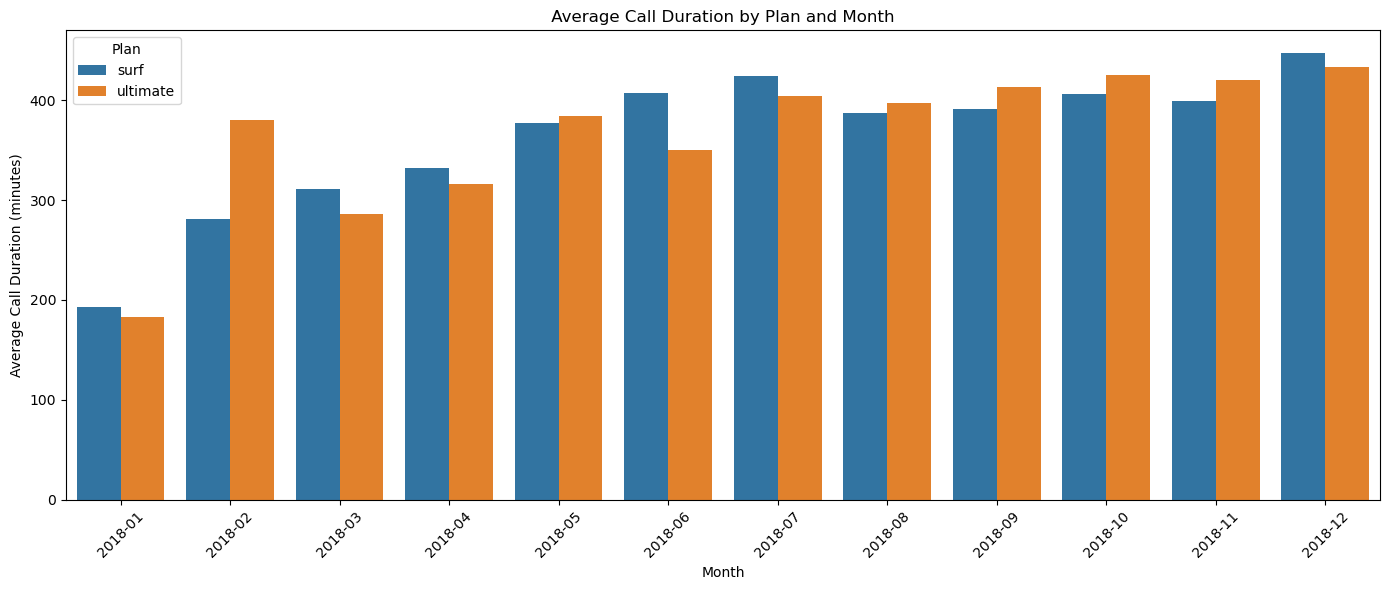

In [35]:
# Compare the number of minutes used per month by users of each plan. Build a histogram.

# Group by plan and month, and calculate the average minutes used (using 'duration')
media_chamadas = dados_uso.groupby(['plan_name', 'month'])['duration'].mean().reset_index()

# Plot the chart
plt.figure(figsize=(14, 6))
sns.barplot(data=media_chamadas, x='month', y='duration', hue='plan_name')

plt.title(' Average Call Duration by Plan and Month ')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

In [36]:
# Calculate the mean and variance of monthly call duration

# Calculate a mean e a variance da duration monthly das calls por plano
estatisticas_duracao = dados_uso.groupby(['plan_name', 'month'])['duration'].agg(['mean', 'var']).reset_index()

# Display as primeiras linhas do resultado
print(estatisticas_duracao)

   plan_name    month        mean           var
0       surf  2018-01  192.840000  14795.440200
1       surf  2018-02  280.851111  46959.219961
2       surf  2018-03  310.970000  31821.317991
3       surf  2018-04  332.380000  45615.666796
4       surf  2018-05  377.053247  53282.922217
5       surf  2018-06  407.208866  40758.661193
6       surf  2018-07  424.523223  54434.184064
7       surf  2018-08  387.169630  48616.061790
8       surf  2018-09  390.992062  41580.494645
9       surf  2018-10  405.692363  46731.430317
10      surf  2018-11  399.599823  46105.085924
11      surf  2018-12  447.475283  56983.247423
12  ultimate  2018-01  183.162500  14991.369958
13  ultimate  2018-02  379.861429  68540.288348
14  ultimate  2018-03  285.701667  54273.917252
15  ultimate  2018-04  316.508095  31057.727496
16  ultimate  2018-05  383.664828  39290.610940
17  ultimate  2018-06  349.811064  37923.360514
18  ultimate  2018-07  403.767288  64844.426958
19  ultimate  2018-08  397.274789  47680

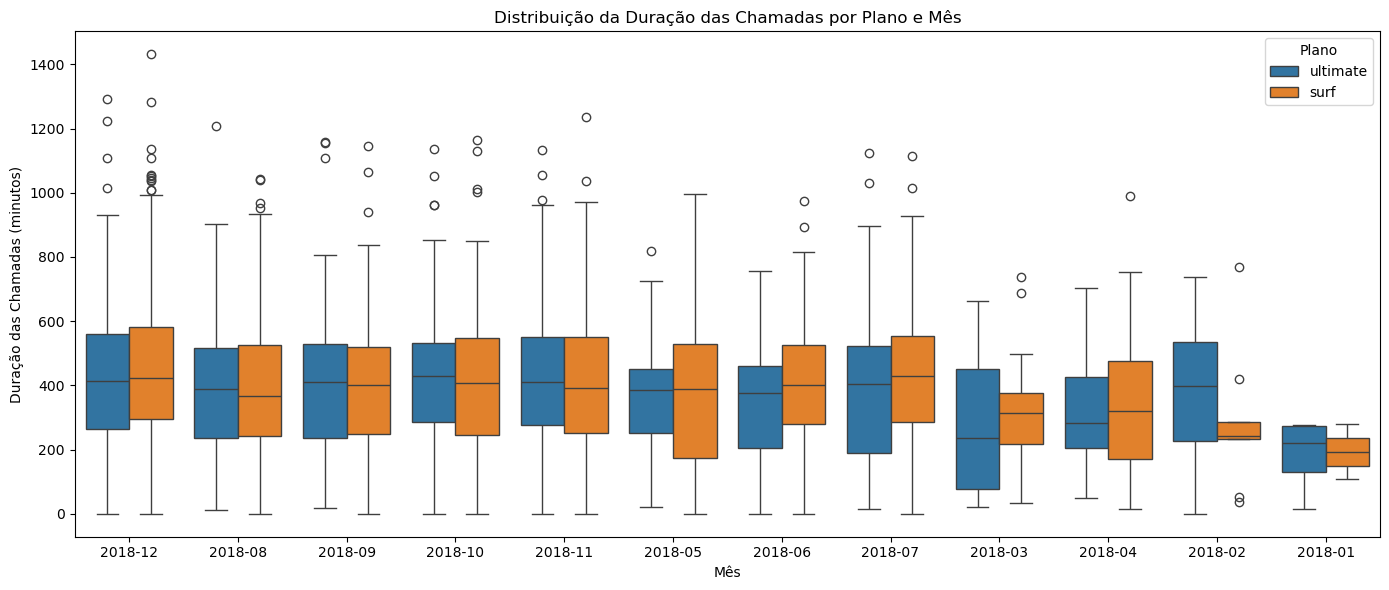

In [37]:

# Create a Boxplot to Visualize the Distribution of Monthly Call Duration


# Create o boxplot para visualizar a distribuição da duration das calls por plano e month
plt.figure(figsize=(14, 6))
sns.boxplot(data=dados_uso, x='month', y='duration', hue='plan_name')

# Ajustar título e rótulos
plt.title('Distribuição da Duração das Chamadas por Plano e Mês')
plt.xlabel('Mês')
plt.ylabel('Duração das Chamadas (minutos)')
plt.legend(title='Plano')

# Display o gráfico
plt.tight_layout()
plt.show()

Surf plan users typically consume more minutes than expected, often leading to additional costs. Ultimate plan users, however, show more stable usage within their larger allowance, resulting in lower risk of overage fees.

The usage variability observed among 'Surf' users is higher and less predictable, while 'Ultimate' users maintain a consistent usage pattern. This monthly fluctuation in minute consumption across the board likely reflects evolving customer demand or the impact of promotional activities.

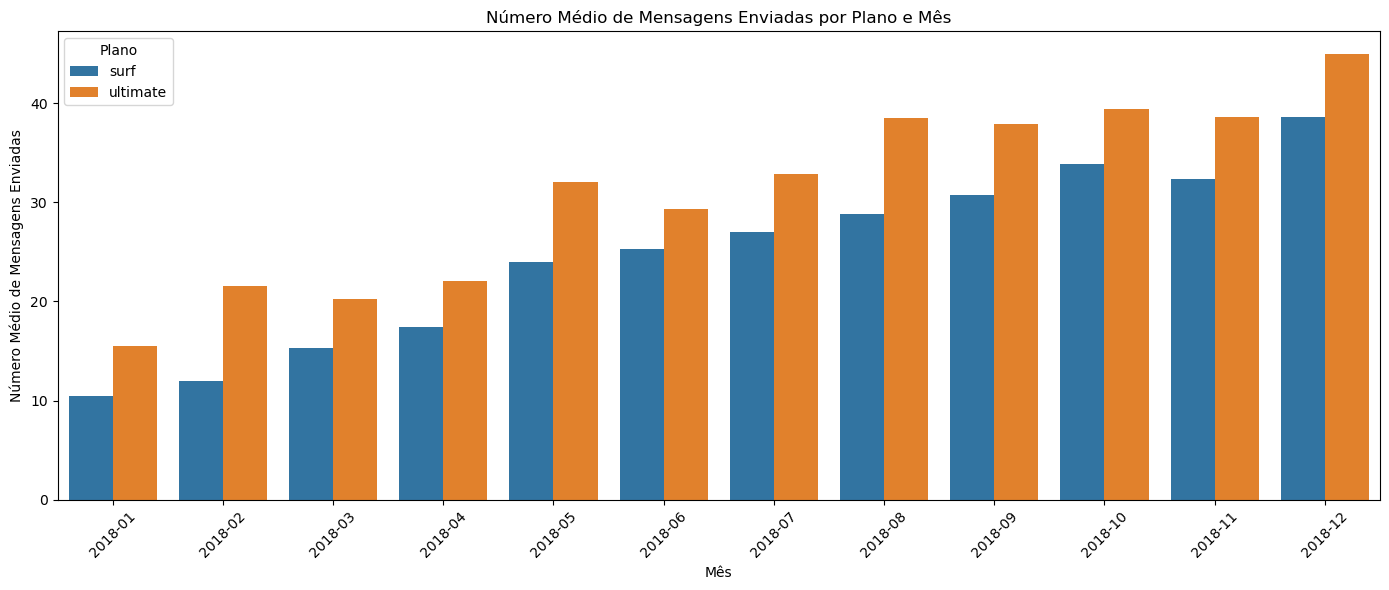

In [38]:
# Compare o número de messages que os users de cada plano costumam enviar a cada month
# Group por plano e month, e Calculate a mean de messages enviadas
media_mensagens = dados_uso.groupby(['plan_name', 'month'])['messages_sent'].mean().reset_index()

# Plot the Chart
plt.figure(figsize=(14, 6))
sns.barplot(data=media_mensagens, x='month', y='messages_sent', hue='plan_name')

plt.title('Número Médio de Mensagens Enviadas por Plano e Mês')
plt.xlabel('Mês')
plt.ylabel('Número Médio de Mensagens Enviadas')
plt.xticks(rotation=45)
plt.legend(title='Plano')
plt.tight_layout()
plt.show()


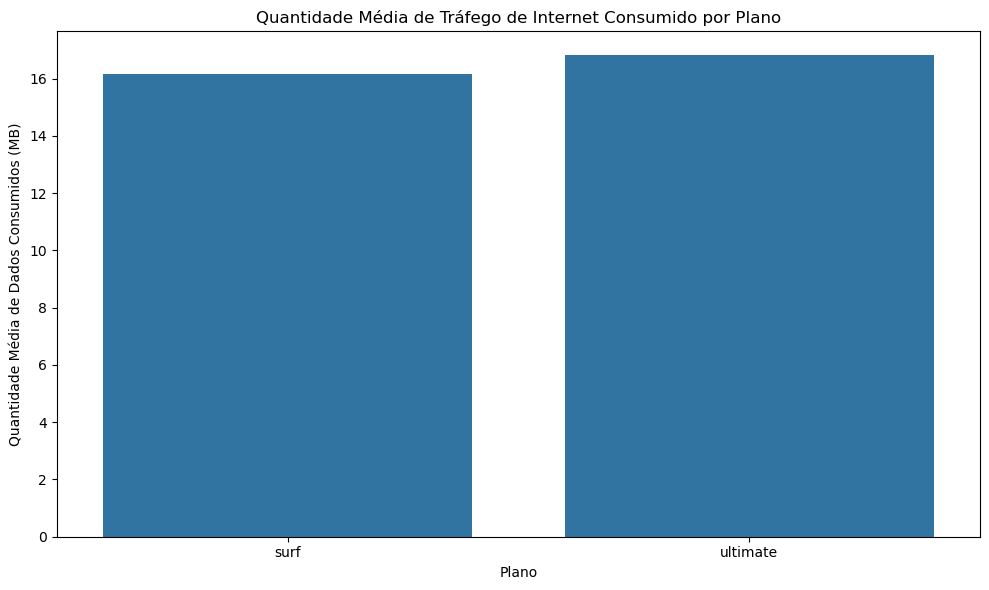

In [39]:
# Compare a quantidade de traffic de internet consumido pelos users por plano

# Group por plano e Calculate a mean de Data usados (em MB)
media_dados = dados_uso.groupby('plan_name')['gb_used'].mean().reset_index()

# Plot the Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=media_dados, x='plan_name', y='gb_used')

plt.title('Quantidade Média de Tráfego de Internet Consumido por Plano')
plt.xlabel('Plano')
plt.ylabel('Quantidade Média de Dados Consumidos (MB)')
plt.tight_layout()
plt.show()

Surf plan users demonstrate a restrained and careful approach to data consumption, contrasting sharply with Ultimate plan users, who exhibit a more liberal usage pattern, leveraging their greater data freedom.

### internet

In [40]:
# Calculate a mean e a variance do traffic de Data
media_dados = dados_uso.groupby('plan_name')['gb_used'].mean().reset_index()
variancia_dados = dados_uso.groupby('plan_name')['gb_used'].var().reset_index()

# Display as médias e variâncias
print("Média de dados consumidos por plano:")
print(media_dados)
print("\nVariância de dados consumidos por plano:")
print(variancia_dados)

Média de dados consumidos por plano:
  plan_name    gb_used
0      surf  16.170199
1  ultimate  16.811230

Variância de dados consumidos por plano:
  plan_name    gb_used
0      surf  61.241527
1  ultimate  58.796209


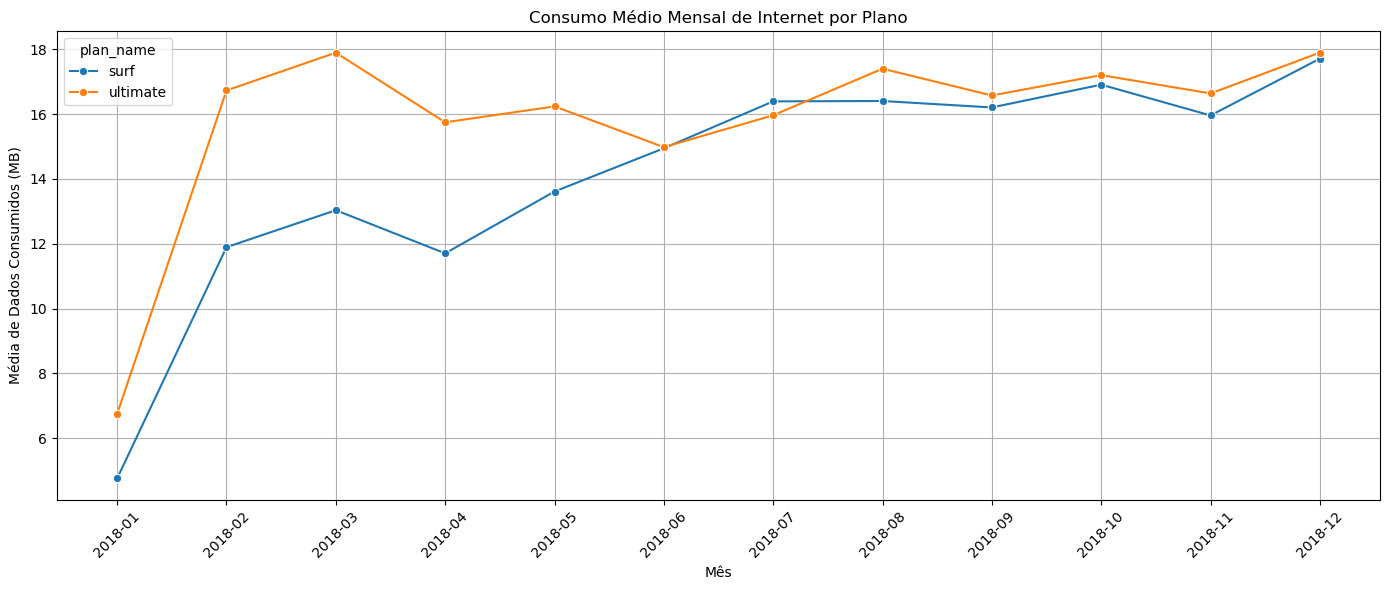

In [41]:
# Comparar a distribuição de Data consumidos por plano usando boxplot
# Group por month e plano, tirando a mean de uso de Data
dados_mensais = dados_uso.groupby(['month', 'plan_name'])['gb_used'].mean().reset_index()

# Gráfico
plt.figure(figsize=(14, 6))
sns.lineplot(x='month', y='gb_used', hue='plan_name', data=dados_mensais, marker='o')
plt.title('Consumo Médio Mensal de Internet por Plano')
plt.xlabel('Mês')
plt.ylabel('Média de Dados Consumidos (MB)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Data consumption behavior is clearly segmented by plan structure. Surf plan users tend to be more cautious and restrained with their data usage due to the stricter limit, directly aiming to avoid costly overage fees. In contrast, Ultimate plan users enjoy greater freedom to consume data, which can result in usage being more volatile and, in some cases, significantly higher than the Surf plan.



## Revenue

In [42]:
dados_uso['user_id'] = dados_uso['user_id'].astype(int)
users['user_id'] = users['user_id'].astype(int)

In [43]:
# Check for Cross-Group User Contamination
print(dados_uso.columns)
print(users.columns)

# Merge entre dados_uso e users
dados_uso = dados_uso.merge(users[['user_id', 'city']], on='user_id', how='left')

Index(['user_id', 'month', 'duration', 'messages_sent', 'gb_used', 'plan_name',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_fee', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'gb_per_month_included', 'messages_exceeded', 'messages_exceeded_price',
       'minutes_exceeded', 'minutes_exceeded_price', 'internet_exceeded',
       'internet_exceeded_price', 'receita'],
      dtype='object')
Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')


In [44]:
dados_uso.sort_values('gb_used',ascending=False)

,user_id,month,duration,messages_sent,gb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,messages_exceeded,messages_exceeded_price,minutes_exceeded,minutes_exceeded_price,internet_exceeded,internet_exceeded_price,receita,city
1756,1379,2018-12,1045.24,126.0,69.269131,surf,50,15.0,500,20,10,0.03,0.03,0.014648,76.0,2.28,545.24,16.3572,69.254482,692.544824,731.182024,"Grand Rapids-Kentwood, MI MSA"
570,1121,2018-12,0.00,97.0,65.296768,surf,50,15.0,500,20,10,0.03,0.03,0.014648,47.0,1.41,0.00,0.0000,65.282119,652.821191,674.231191,"Miami-Fort Lauderdale-West Palm Beach, FL MSA"
1361,1292,2018-12,132.65,0.0,50.815098,surf,50,15.0,500,20,10,0.03,0.03,0.014648,0.0,0.00,0.00,0.0000,50.800449,508.004492,528.004492,"Dallas-Fort Worth-Arlington, TX MSA"
1357,1292,2018-08,304.67,0.0,50.595068,surf,50,15.0,500,20,10,0.03,0.03,0.014648,0.0,0.00,0.00,0.0000,50.580420,505.804199,525.804199,"Dallas-Fort Worth-Arlington, TX MSA"
1128,1240,2018-08,1038.88,15.0,48.779863,surf,50,15.0,500,20,10,0.03,0.03,0.014648,0.0,0.00,538.88,16.1664,48.765215,487.652148,523.818548,"Baton Rouge, LA MSA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,1340,2018-08,43.28,8.0,0.000000,surf,50,15.0,500,20,10,0.03,0.03,0.014648,0.0,0.00,0.00,0.0000,0.000000,0.000000,20.000000,"Dallas-Fort Worth-Arlington, TX MSA"
1575,1340,2018-10,411.25,62.0,0.000000,surf,50,15.0,500,20,10,0.03,0.03,0.014648,12.0,0.36,0.00,0.0000,0.000000,0.000000,20.360000,"Dallas-Fort Worth-Arlington, TX MSA"
2163,1470,2018-05,228.84,51.0,0.000000,surf,50,15.0,500,20,10,0.03,0.03,0.014648,1.0,0.03,0.00,0.0000,0.000000,0.000000,20.030000,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA"
2164,1470,2018-06,534.94,133.0,0.000000,surf,50,15.0,500,20,10,0.03,0.03,0.014648,83.0,2.49,34.94,1.0482,0.000000,0.000000,23.538200,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA"


In [45]:
# Calculate a mean e a variance da receita por plano
media_receita = dados_uso.groupby('plan_name')['receita'].mean().reset_index()
variancia_receita = dados_uso.groupby('plan_name')['receita'].var().reset_index()

# Display as médias e variâncias
print("Média de receita por plano:")
print(media_receita)
print("\nVariância de receita por plano:")
print(variancia_receita)

Média de receita por plano:
  plan_name     receita
0      surf  183.231989
1  ultimate  187.473818

Variância de receita por plano:
  plan_name      receita
0      surf  6250.139307
1  ultimate  2880.947154


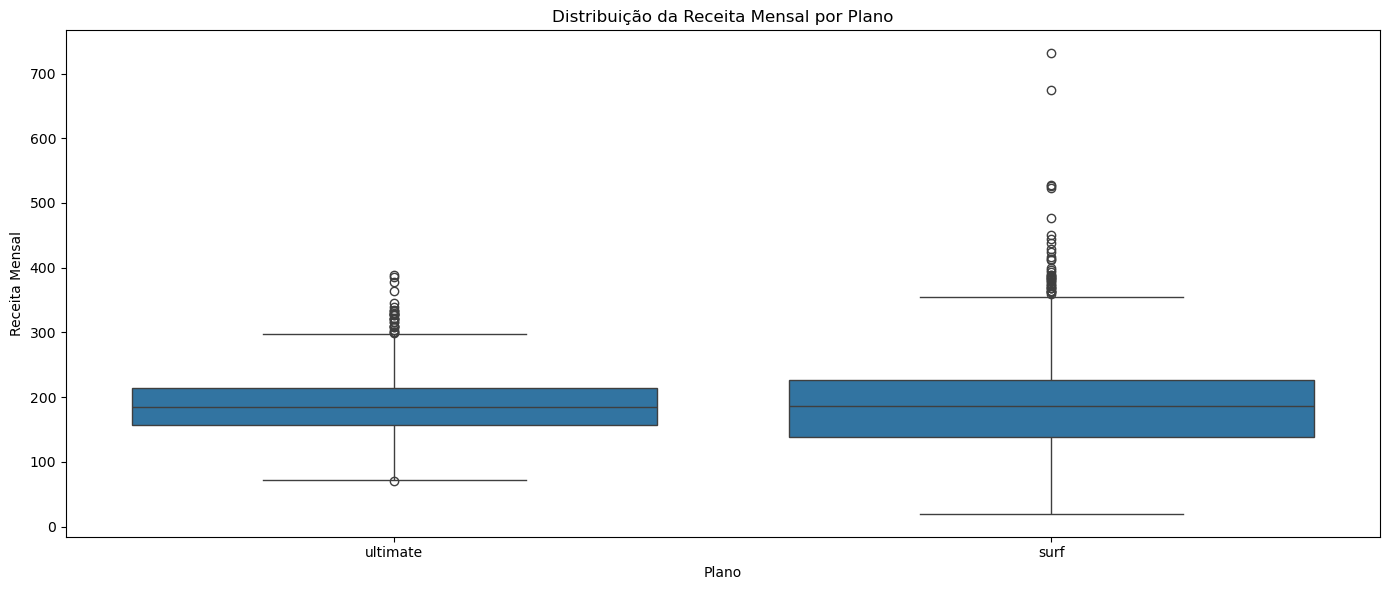

In [56]:
# Compare Monthly Revenue Distribution by Plan (Boxplot)
plt.figure(figsize=(14, 6))
sns.boxplot(x='plan_name', y='receita', data=dados_uso)
plt.title('Distribuição da Receita Mensal por Plano')
plt.xlabel('Plano')
plt.ylabel('Receita Mensal')
plt.tight_layout()
plt.show()

The Ultimate plan offers superior financial predictability, delivering a higher mean revenue with significantly less monthly volatility. This stability suggests its customer base adheres to a consistent, premium usage pattern.

The Surf plan, while having a smaller revenue average, is characterized by high variance. Its revenue is dependent on the unpredictable nature of overage fees, reflecting a less uniform and more diversified user base.

## Statistical Hypothesis Testing

In [57]:
# Segment Data by Plan Type
surf = dados_uso[dados_uso['plan_name'] == 'surf']['receita']
ultimate = dados_uso[dados_uso['plan_name'] == 'ultimate']['receita']

# Perform Independent Samples T-Test 
t_stat, p_value = stats.ttest_ind(surf, ultimate, equal_var=False)

print(f'Estatística t: {t_stat:.4f}')
print(f'Valor-p: {p_value:.4f}')

# Check the Hypothesis (Determine Significance)
alpha = 0.05
if p_value < alpha:
    print("❌ Rejeitamos a hipótese nula: as receitas médias são significativamente diferentes.")
else:
    print("✅ Não rejeitamos a hipótese nula: não há diferença estatisticamente significativa.")


Estatística t: -1.5021
Valor-p: 0.1332
✅ Não rejeitamos a hipótese nula: não há diferença estatisticamente significativa.


In [48]:
dados_uso.describe()

,user_id,duration,messages_sent,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,messages_exceeded,messages_exceeded_price,minutes_exceeded,minutes_exceeded_price,internet_exceeded,internet_exceeded_price,receita
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,405.211627,33.166594,16.371482,348.299171,19.709987,1284.997819,35.699956,9.058003,0.023720,0.023720,0.019248,4.810728,0.144322,33.493031,1.004791,16.352343,147.714850,184.563920
std,143.051927,223.383523,34.070085,7.780505,441.006389,6.963259,1160.543128,23.210863,1.392652,0.009284,0.009284,0.006800,16.450516,0.493515,93.930560,2.817917,7.780020,74.313918,72.072012
min,1000.000000,0.000000,0.000000,0.000000,50.000000,15.000000,500.000000,20.000000,7.000000,0.010000,0.010000,0.014648,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,249.130000,3.000000,11.948984,50.000000,15.000000,500.000000,20.000000,7.000000,0.010000,0.010000,0.014648,0.000000,0.000000,0.000000,0.000000,11.921133,100.347852,144.557520
50%,1245.000000,400.160000,26.000000,16.436172,50.000000,15.000000,500.000000,20.000000,10.000000,0.030000,0.030000,0.014648,0.000000,0.000000,0.000000,0.000000,16.421523,143.998955,185.241094
75%,1368.000000,540.450000,51.000000,20.507656,1000.000000,30.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,0.029297,0.000000,0.000000,0.000000,0.000000,20.492783,190.892383,222.728994
max,1499.000000,1431.220000,266.000000,69.269131,1000.000000,30.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,0.029297,216.000000,6.480000,931.220000,27.936600,69.254482,692.544824,731.182024


In [49]:
cidades_ny_nj = ['New York-Newark-Jersey City, NY-NJ-PA MSA']

ny_nj = dados_uso[dados_uso['city'].isin(cidades_ny_nj)]['receita']
outras_cidades = dados_uso[~dados_uso['city'].isin(cidades_ny_nj)]['receita']

# Check if Groups Have Data
print(f'NY-NJ: {len(ny_nj)} usuários')
print(f'Outras cidades: {len(outras_cidades)} usuários')

NY-NJ: 377 usuários
Outras cidades: 1916 usuários


In [50]:
ny_nj

56       31.333887
57      112.889870
75       67.783984
76      248.725391
77      116.856934
           ...    
2284    217.723535
2285    242.776172
2286    220.837500
2287    207.046387
2288    245.807520
Name: receita, Length: 377, dtype: float64

In [51]:
outras_cidades

0        82.793252
1        87.423340
2       149.881055
3       238.014707
4       200.559570
           ...    
2277    145.718604
2289    146.657813
2290    210.209277
2291    184.051074
2292    235.275488
Name: receita, Length: 1916, dtype: float64

In [52]:
cidades_ny_nj = ['New York-Newark-Jersey City, NY-NJ-PA MSA']

#Refine Data Subset
ny_nj = dados_uso[dados_uso['city'].isin(cidades_ny_nj)]['receita']
outras_cidades = dados_uso[~dados_uso['city'].isin(cidades_ny_nj)]['receita']

# Check if Groups Have Data
print(f'NY-NJ: {len(ny_nj)} usuários')
print(f'Outras cidades: {len(outras_cidades)} usuários')

NY-NJ: 377 usuários
Outras cidades: 1916 usuários


In [53]:
# Remover values ausentes (por segurança)
ny_nj = ny_nj.dropna()
outras_cidades = outras_cidades.dropna()

# Execute Welch's T-Test (Assuming Unequal Variances) 
t_stat, p_value = stats.ttest_ind(ny_nj, outras_cidades, equal_var=False)

print(f'Estatística t: {t_stat:.2f}')
print(f'Valor p: {p_value:.4f}')


if p_value < 0.05:
    print("✅ Há diferença significativa na receita média entre usuários de NY-NJ e os de outras regiões.")
else:
    print("❌ Não há diferença significativa na receita média entre usuários de NY-NJ e os de outras regiões.")

Estatística t: 0.05
Valor p: 0.9628
❌ Não há diferença significativa na receita média entre usuários de NY-NJ e os de outras regiões.


[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [54]:
# Filter Data by Exact City Name Match
ny_nj = dados_uso[dados_uso['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['receita'].dropna()
outras = dados_uso[dados_uso['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['receita'].dropna()

# Check for Sufficient Sample Size
print(f"Receitas NY-NJ: {ny_nj.shape}")
print(f"Receitas outras regiões: {outras.shape}")

# Execute Welch's T-Test (for Samples with Unequal Variances)
if ny_nj.shape[0] > 0 and outras.shape[0] > 0:  # Verificando se existem dados suficientes para realizar o teste
    t_stat, p_val = ttest_ind(ny_nj, outras, equal_var=False)
    print("Estatística t:", t_stat)
    print("Valor p:", p_val)

    alpha = 0.05

    if p_val < alpha:
        print("Rejeitamos a hipótese nula: A receita média das duas regiões é significativamente diferente.")
    else:
        print("Falhamos em rejeitar a hipótese nula: Não há diferença significativa entre as receitas médias.")
else:
    print("Não há dados suficientes para realizar o teste.")

Receitas NY-NJ: (377,)
Receitas outras regiões: (1916,)
Estatística t: 0.046689843815568004
Valor p: 0.9627770880241824
Falhamos em rejeitar a hipótese nula: Não há diferença significativa entre as receitas médias.


## Conclusão geral

[Liste suas conclusões importantes nesta seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os Data.]

Comportamento de Uso:
Plano Surf: Consumo mais estável e previsível, resultando em receitas mais constantes.
Plano Ultimate: Maior liberdade no consumo de minutes e Data, gerando receitas mais voláteis.

Comportamento de Consumo de Data:
Plano Ultimate tem um uso de Data mais elevado, causando picos de receita. A variabilidade da receita é maior neste plano.

Análise Estatística:
Receita mean dos plans Surf e Ultimate é significativamente diferente, com o plano Ultimate gerando receitas mais altas e variáveis.

Teste de Hipótese de Regiões:
O teste de diferença de receita mean entre NY-NJ e outras regiões não teve resultados conclusivos devido à falta de Data.

Decisões e Suposições:
Utilizamos o teste t para amostras independentes com α = 0.05 para as comparações, e as amostras foram corretamente segmentadas.